In [1]:
%load_ext lab_black
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

sns.set(
    # context="talk",
    # font_scale=1,  # make the font larger; default is pretty small
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

#  Akta data functions

In [2]:
sys.path.insert(0, "/net/software/scripts/akta_happy")
from akta_hap import get_UV, parse_file
from IPython.utils import io

# Plot SEC

  0%|          | 0/6 [00:00<?, ?it/s]

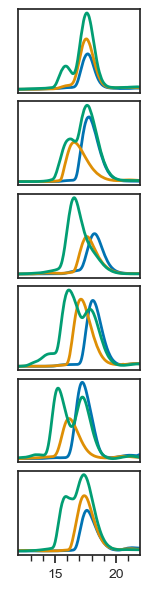

In [6]:
import matplotlib
from matplotlib import rc, font_manager

import matplotlib.ticker as ticker

matplotlib.rc("font", family="sans-serif")
matplotlib.rc("font", serif="FreeSans")
matplotlib.rc("text", usetex="false")
matplotlib.rcParams.update({"font.size": 10})

groups = {
    "cs_074": [
        "/home/flop/Desktop/SEC/cs_paper1/other_binding/FF74A.zip",
        "/home/flop/Desktop/SEC/cs_paper1/other_binding/FF74B.zip",
        "/home/flop/Desktop/SEC/cs_paper1/other_binding/FF74comp.zip",
    ],
    "cs_094": [
        "/projects/crispy_shifty/data/sec/20220210_s200_TBS_SEC_autosampler_1mlfr_dump20+/94A.zip",
        "/projects/crispy_shifty/data/sec/20220210_s200_TBS_SEC_autosampler_1mlfr_dump20+/94B2.zip",
        "/projects/crispy_shifty/data/sec/20220210_s200_TBS_SEC_autosampler_1mlfr_dump20+/94AB2.zip",
    ],
    "cs_201": [
        "/projects/crispy_shifty/data/sec/20220418_s200_TBS_SEC_autosampler_1mlfr_dump20+/201A.zip",
        "/projects/crispy_shifty/data/sec/20220418_s200_TBS_SEC_autosampler_1mlfr_dump20+/201B.zip",
        "/projects/crispy_shifty/data/sec/20220418_s200_TBS_SEC_autosampler_1mlfr_dump20+/201AB.zip",
    ],
    "cs_207": [
        "/projects/crispy_shifty/data/sec/20220301_s200_TBS_SEC_autosampler_1mlfr_dump20+/207A+.zip",
        "/projects/crispy_shifty/data/sec/20220301_s200_TBS_SEC_autosampler_1mlfr_dump20+/207B+.zip",
        "/projects/crispy_shifty/data/sec/20220301_s200_TBS_SEC_autosampler_1mlfr_dump20+/207AB+.zip",
    ],
    "cs_221": [
        # "/home/flop/Desktop/SEC/cs_paper1/other_binding/221A.zip",
        # "/home/flop/Desktop/SEC/cs_paper1/other_binding/221B.zip",
        # "/home/flop/Desktop/SEC/cs_paper1/other_binding/221comp.zip",
        "/projects/crispy_shifty/data/sec/20220314_s200_TBS_SEC_autosampler_1mlfr_dump20+/221A.zip",
        "/projects/crispy_shifty/data/sec/20220314_s200_TBS_SEC_autosampler_1mlfr_dump20+/221B.zip",
        "/projects/crispy_shifty/data/sec/20220314_s200_TBS_SEC_autosampler_1mlfr_dump20+/221AB.zip",
    ],
    "js_007": [
        "/projects/crispy_shifty/data/sec/20220210_s200_TBS_SEC_autosampler_1mlfr_dump20+/J7A.zip",
        "/projects/crispy_shifty/data/sec/20220210_s200_TBS_SEC_autosampler_1mlfr_dump20+/J7B2.zip",
        "/projects/crispy_shifty/data/sec/20220210_s200_TBS_SEC_autosampler_1mlfr_dump20+/J7AB2.zip",
    ],
    # "js_109": [
    #     "/projects/crispy_shifty/data/sec/20220210_s200_TBS_SEC_autosampler_1mlfr_dump20+/J9A.zip",
    #     "/projects/crispy_shifty/data/sec/20220210_s200_TBS_SEC_autosampler_1mlfr_dump20+/J9B.zip",
    #     "/projects/crispy_shifty/data/sec/20220210_s200_TBS_SEC_autosampler_1mlfr_dump20+/J9AB.zip",
    # ],
}
uvs = ["230"]
cm = 1 / 2.54  # centimeters in inches
fig, ax = plt.subplots(
    nrows=len(groups),
    ncols=1,
    sharex=True,
    figsize=(4 * cm, len(groups) * 3 * cm),
    gridspec_kw={"hspace": 0.1},
)
for i, (cs, files) in enumerate(tqdm(groups.items())):
    files = " ".join(files)
    for file in files.split():
        with io.capture_output() as captured:  # suppress superfluous prints

            if not file.endswith(".zip"):
                print(f"{file} does not end with .zip and so will be skipped")
                continue
            # grab the entire dataset
            full_df = parse_file(file)
            output_name = file.split("/")[-1]

            df = pd.DataFrame()

            for uv in uvs:
                if os.path.exists(f"sec/{output_name}.csv"):
                    df = pd.read_csv(f"sec/{output_name}.csv")
                else:
                    try:
                        df = pd.concat(
                            [df, get_UV(full_df, uv, False, 12, 22)],
                            axis="columns",
                            ignore_index=False,
                        )
                        df.to_csv(f"sec/{output_name}.csv")
                    except ValueError:
                        print(f"UV {uv} not found in file {file}! Skipping!")
            if df.empty:
                print(f"unable to extract any data from {file}")
                continue

        for count, uv_label in enumerate(df.columns[df.columns.str.contains("uv")]):
            vol_label = uv_label.replace("uv", "vol")
            df_plot = df[[uv_label, vol_label]]
            # hacky baseline fix, doesn't matter because it's AU anyway
            to_plot = df_plot[uv_label].values - np.min(df_plot[uv_label].values)
            ax[i].plot(
                df_plot[vol_label],
                to_plot,
                linewidth=2,
            )
            ax[i].margins(x=0)
            ax[i].set_yticks([])
            ax[i].xaxis.set_minor_locator(ticker.MultipleLocator(1))
            ax[i].tick_params(labelsize=10, which="both")
            # # remove right spines
            # ax[i].spines["right"].set_visible(False)
            if cs != "js_007":
                ax[i].tick_params(axis="x", which="both", length=0)
plt.savefig(f"SEC.png", dpi=300, bbox_inches="tight", transparent=True)